In [7]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import pandas as pd

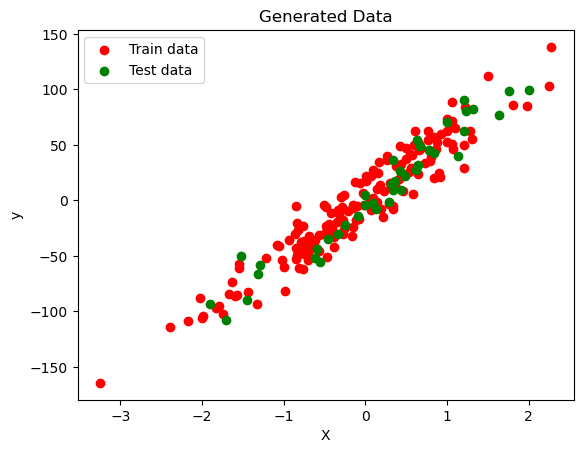

In [2]:
X, y = make_regression(n_samples=200, n_features=1, noise=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254397)
plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [3]:
#Normalizacja
y_min = min(y_train)
y_max = max(y_train)
y_train = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_train]

x_min = min(X_train)
x_max = max(X_train)
X_train = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_train])

Text(0, 0.5, 'Y')

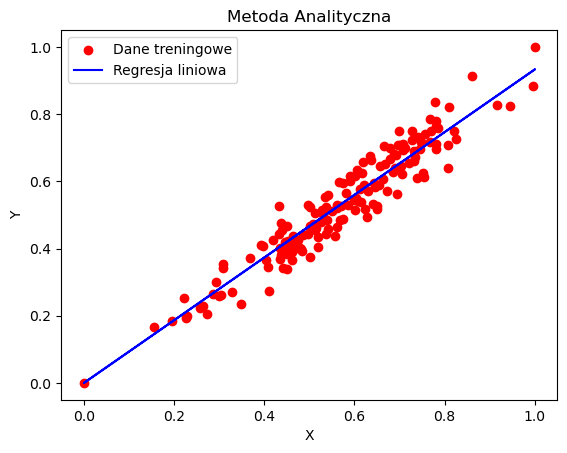

In [4]:
#Metoda analityczna
theta = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
y_pred = X_train @ theta
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred, color='blue', label='Regresja liniowa')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')


Analityczna: [0.93314813], numeryczna: [0.93314813]


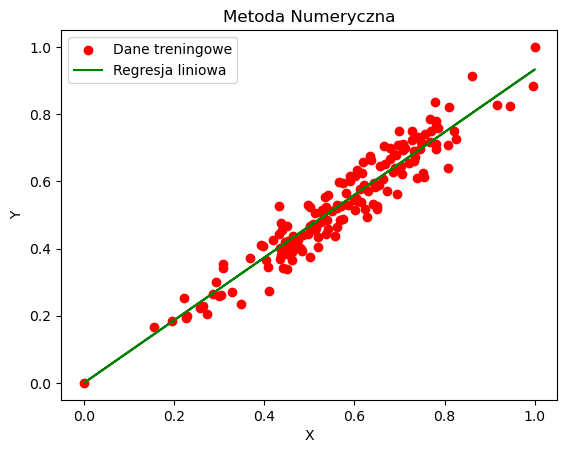

In [5]:
#Metoda numeryczna
def cost_function(teta, X, y):
    return 1/(len(X))*(y - X.T * teta) @ (y - X.T * teta).T
result = minimize(cost_function, x0=0, args=(X_train, y_train), method='Powell')
coeff = result.x
y_pred_powell = X_train.dot(coeff)
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred_powell, color='green', label='Regresja liniowa')
plt.title('Metoda Numeryczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Analityczna: {theta}, numeryczna: {coeff}')

In [17]:
column_names = ['X', 'y']
flapy_1 = pd.read_csv('last_autosave_1.csv', names=column_names)
flapy_2 = pd.read_csv('last_autosave_2.csv', names=column_names)
flapy_3 = pd.read_csv('last_autosave_3.csv', names=column_names)
X_1 = flapy_1['X']
y_1 = flapy_1['y']

X_2 = flapy_2['X']
y_2 = flapy_2['y']

X_3 = flapy_3['X']
y_3 = flapy_3['y']
y_1

0     110.185185
1     110.185185
2     137.962963
3     137.962963
4     137.962963
5     204.629630
6     168.518519
7      99.074074
8      99.074074
9      90.740741
10    146.296296
11    146.296296
12    146.296296
13    146.296296
14    171.296296
15    171.296296
16    171.296296
17    157.407407
18    157.407407
19    157.407407
20    157.407407
21    129.629630
22    129.629630
23    129.629630
24    129.629630
25    140.740741
26    140.740741
27    140.740741
28    140.740741
29    162.962963
30    162.962963
31    162.962963
32    162.962963
33    179.629630
34    179.629630
35    179.629630
36    129.629630
37    129.629630
38    129.629630
39     93.518519
40     93.518519
41     93.518519
42    115.740741
43    115.740741
44    115.740741
45    115.740741
46    160.185185
47    160.185185
48    160.185185
49    126.851852
50    126.851852
51    126.851852
52     26.851852
53     26.851852
54     26.851852
Name: y, dtype: float64